In this notebook I will try to create a composite map from our canny arrays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os

%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa a 2019 dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [2]:
current_path = os.getcwd()
current_path

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks'

In [4]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'C:\\Users\\asus\\GitHub\\JUNO\\notebooks\\../data'

In [5]:
nc_path = os.path.join(data_folder, "IBI2017-2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [6]:
print(ds)     # informações relativas ao ficheiro netCDF

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(1088

In [7]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
datadf2 = datadf.reset_index()

In [8]:
datadf2 = datadf2.drop(['depth'], axis=1)     #dropar coluna 'depth' (não é necessária pq é sempre igual)
datadf2    #os dados .nc estão agora no formato de uma dataframe

,latitude,time,longitude,thetao
0,35.0,2017-01-01 12:00:00,-19.000000,17.324001
1,35.0,2017-01-01 12:00:00,-18.916666,17.211000
2,35.0,2017-01-01 12:00:00,-18.833334,17.238001
3,35.0,2017-01-01 12:00:00,-18.750000,17.426001
4,35.0,2017-01-01 12:00:00,-18.666666,17.632999
...,...,...,...,...
22248507,45.0,2019-12-24 12:00:00,-5.333334,12.736000
22248508,45.0,2019-12-24 12:00:00,-5.250000,12.770000
22248509,45.0,2019-12-24 12:00:00,-5.166667,13.017000
22248510,45.0,2019-12-24 12:00:00,-5.083334,13.291000


In [9]:
datadf2 = datadf2[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
datadf2

,time,latitude,longitude,thetao
0,2017-01-01 12:00:00,35.0,-19.000000,17.324001
1,2017-01-01 12:00:00,35.0,-18.916666,17.211000
2,2017-01-01 12:00:00,35.0,-18.833334,17.238001
3,2017-01-01 12:00:00,35.0,-18.750000,17.426001
4,2017-01-01 12:00:00,35.0,-18.666666,17.632999
...,...,...,...,...
22248507,2019-12-24 12:00:00,45.0,-5.333334,12.736000
22248508,2019-12-24 12:00:00,45.0,-5.250000,12.770000
22248509,2019-12-24 12:00:00,45.0,-5.166667,13.017000
22248510,2019-12-24 12:00:00,45.0,-5.083334,13.291000


In [10]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia25 = datadf2[datadf2['time'] == '2019-09-25 12:00:00']
dia25

,time,latitude,longitude,thetao
168493,2019-09-25 12:00:00,35.0,-19.000000,22.527000
168494,2019-09-25 12:00:00,35.0,-18.916666,22.516001
168495,2019-09-25 12:00:00,35.0,-18.833334,22.648001
168496,2019-09-25 12:00:00,35.0,-18.750000,22.809002
168497,2019-09-25 12:00:00,35.0,-18.666666,22.910000
...,...,...,...,...
22233297,2019-09-25 12:00:00,45.0,-5.333334,19.063999
22233298,2019-09-25 12:00:00,45.0,-5.250000,19.021999
22233299,2019-09-25 12:00:00,45.0,-5.166667,18.996000
22233300,2019-09-25 12:00:00,45.0,-5.083334,19.000999


In [11]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia26 = datadf2[datadf2['time'] == '2019-09-26 12:00:00']
dia26

,time,latitude,longitude,thetao
168662,2019-09-26 12:00:00,35.0,-19.000000,22.477001
168663,2019-09-26 12:00:00,35.0,-18.916666,22.535000
168664,2019-09-26 12:00:00,35.0,-18.833334,22.711000
168665,2019-09-26 12:00:00,35.0,-18.750000,22.859001
168666,2019-09-26 12:00:00,35.0,-18.666666,22.924999
...,...,...,...,...
22233466,2019-09-26 12:00:00,45.0,-5.333334,18.885000
22233467,2019-09-26 12:00:00,45.0,-5.250000,18.834999
22233468,2019-09-26 12:00:00,45.0,-5.166667,18.810001
22233469,2019-09-26 12:00:00,45.0,-5.083334,18.831001


In [12]:
def canny_creation(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    #apply the canny algorithm and plot the image with the edges
    canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    canny =np.ma.masked_where(mask_dilated==255, canny)
    
    return canny

In [70]:
Tmax=180
#Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
Temp = dia25.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
#Converter os valores de temperatura no formato uint8 com valores entre 0-255
Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
#apply the canny algorithm and plot the image with the edges
canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=7)
    
mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
#Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
kernel = np.ones((3,3), np.uint8)
mask_dilated = cv2.dilate(mask255, kernel)
canny =np.ma.masked_where(mask_dilated==255, canny)
    

(40.0, 80.0)

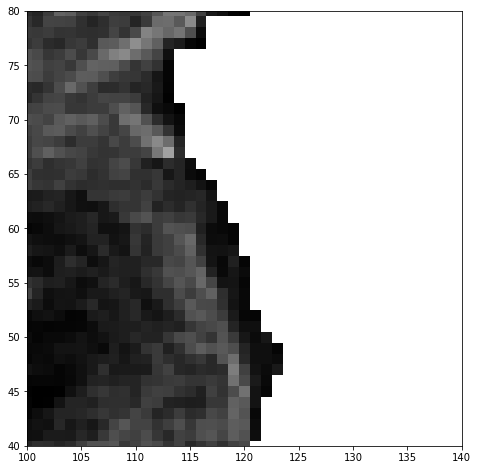

In [57]:
#visualizar os diferentes arrays que vão sendo gerados
plt.imshow(canny, 'gray')
plt.xlim([100, 140])
plt.ylim([40, 80])

In [15]:
canny_25 = canny_creation(dia25, 180)
canny_25

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=uint8)

In [16]:
canny_26 = canny_creation(dia26, 180)
canny_26.shape

(121, 169)

(40.0, 80.0)

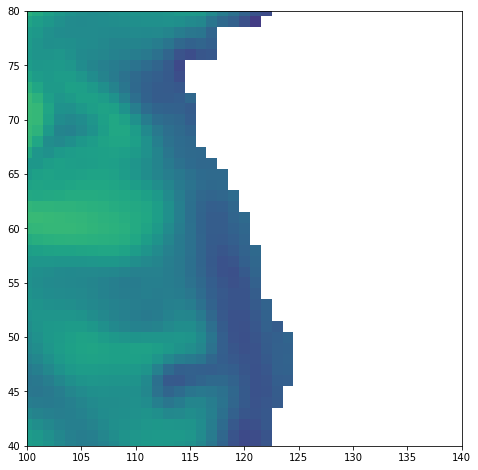

In [56]:
plt.imshow(np.flipud(dia26.pivot_table(index='longitude', columns='latitude', values='thetao').T.values))
plt.xlim([100, 140])
plt.ylim([40, 80])

(40.0, 80.0)

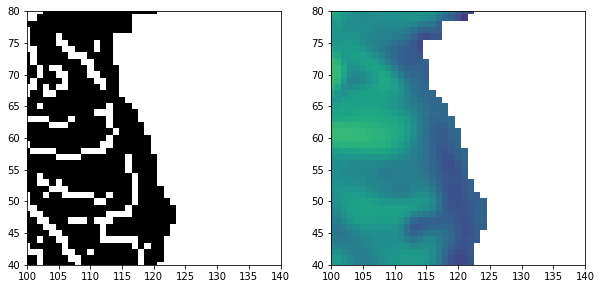

In [71]:

plt.subplot(1,2,1)

plt.imshow(canny, 'gray')
plt.xlim([100, 140])
plt.ylim([40, 80])

plt.subplot(1,2,2)

plt.imshow(np.flipud(dia26.pivot_table(index='longitude', columns='latitude', values='thetao').T.values))
plt.xlim([100, 140])
plt.ylim([40, 80])

### Código para Dividir a dataframe consoante a data

A base de dados sera dividida conforme o dia e depois será aplicada a função canny_creation sobre os dias que se quiser de forma a criar mapas de frontal probability para diferentes epocas do ano

In [18]:
datadf2

,time,latitude,longitude,thetao
0,2017-01-01 12:00:00,35.0,-19.000000,17.324001
1,2017-01-01 12:00:00,35.0,-18.916666,17.211000
2,2017-01-01 12:00:00,35.0,-18.833334,17.238001
3,2017-01-01 12:00:00,35.0,-18.750000,17.426001
4,2017-01-01 12:00:00,35.0,-18.666666,17.632999
...,...,...,...,...
22248507,2019-12-24 12:00:00,45.0,-5.333334,12.736000
22248508,2019-12-24 12:00:00,45.0,-5.250000,12.770000
22248509,2019-12-24 12:00:00,45.0,-5.166667,13.017000
22248510,2019-12-24 12:00:00,45.0,-5.083334,13.291000


In [19]:
df5 = datadf2.copy()

In [20]:
UniqueName2 = [pd.Timestamp(dd).strftime("%Y-%m-%d %H:%M:%S") for dd in df5['time'].unique()]

In [21]:
UniqueName2 = np.array(UniqueName2, dtype=np.object)

In [22]:
UniqueName2

array(['2017-01-01 12:00:00', '2017-01-02 12:00:00',
       '2017-01-03 12:00:00', ..., '2019-12-22 12:00:00',
       '2019-12-23 12:00:00', '2019-12-24 12:00:00'], dtype=object)

In [23]:
#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueName2}

for key in df.keys():
    df[key] = df5[:][df5['time'] == key]

In [24]:
ond2017_2019 = UniqueName2[(UniqueName2>='2017-10-01 12:00:00') & (UniqueName2 <= '2017-12-31 12:00:00') + (UniqueName2>='2018-10-01 12:00:00') & (UniqueName2 <= '2018-12-31 12:00:00') + (UniqueName2>='2019-10-01 12:00:00') & (UniqueName2 <= '2019-12-31 12:00:00')]
ond2017_2019

array(['2017-10-01 12:00:00', '2017-10-02 12:00:00',
       '2017-10-03 12:00:00', '2017-10-04 12:00:00',
       '2017-10-05 12:00:00', '2017-10-06 12:00:00',
       '2017-10-07 12:00:00', '2017-10-08 12:00:00',
       '2017-10-09 12:00:00', '2017-10-10 12:00:00',
       '2017-10-11 12:00:00', '2017-10-12 12:00:00',
       '2017-10-13 12:00:00', '2017-10-14 12:00:00',
       '2017-10-15 12:00:00', '2017-10-16 12:00:00',
       '2017-10-17 12:00:00', '2017-10-18 12:00:00',
       '2017-10-19 12:00:00', '2017-10-20 12:00:00',
       '2017-10-21 12:00:00', '2017-10-22 12:00:00',
       '2017-10-23 12:00:00', '2017-10-24 12:00:00',
       '2017-10-25 12:00:00', '2017-10-26 12:00:00',
       '2017-10-27 12:00:00', '2017-10-28 12:00:00',
       '2017-10-29 12:00:00', '2017-10-30 12:00:00',
       '2017-10-31 12:00:00', '2017-11-01 12:00:00',
       '2017-11-02 12:00:00', '2017-11-03 12:00:00',
       '2017-11-04 12:00:00', '2017-11-05 12:00:00',
       '2017-11-06 12:00:00', '2017-11-07 12:0

In [25]:
len(ond2017_2019)

269

In [26]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation e somo esses valores ao array canny

canny = np.zeros((121,169))
for days in ond2017_2019:
    canny = canny + canny_creation(df[days], 180)

In [27]:
canny_max = canny.max()
canny_max

46665.0

In [46]:
canny25 = canny_creation(dia25, 180)

In [49]:
canny25

AttributeError: 'MaskedArray' object has no attribute 'hist'

In [54]:
len(ond2017_2019)

269

In [50]:
# tenho de dividir por este valor pois Setembro tem 30 dias e o máximo valor do canny é 255 (intensidade do pixel)
canny = canny/(len(ond2017_2019)*255) 

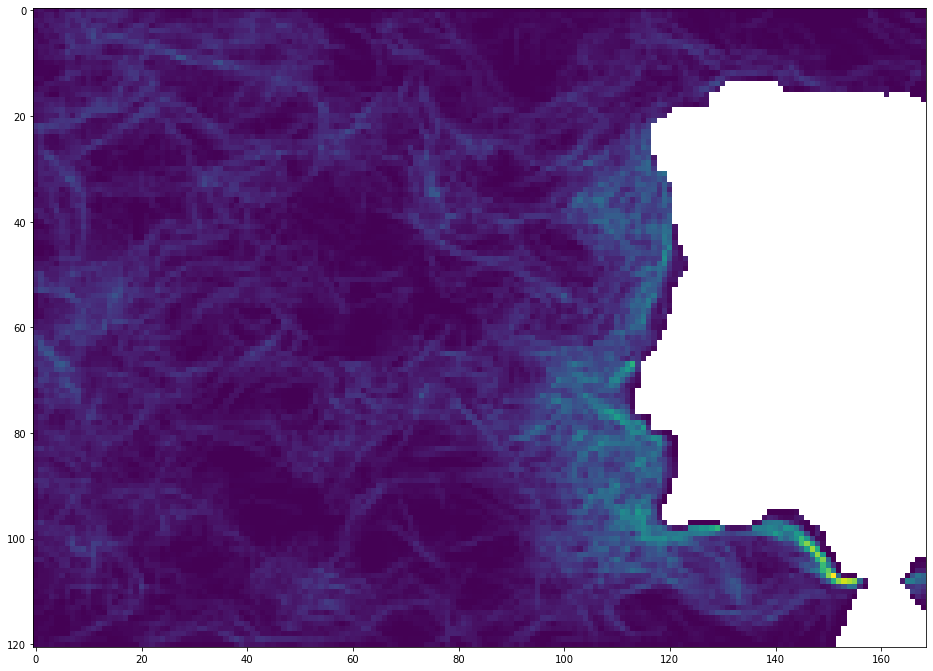

In [52]:
plt.imshow(canny)

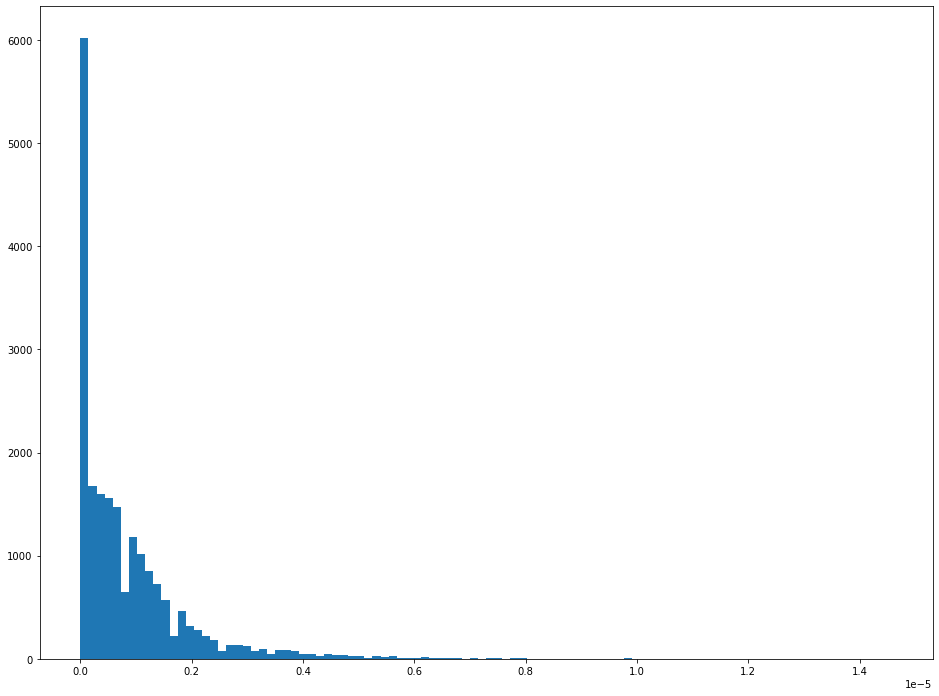

In [53]:
plt.hist(canny.flatten(), bins=100);
plt.rcParams["figure.figsize"] = 10, 8

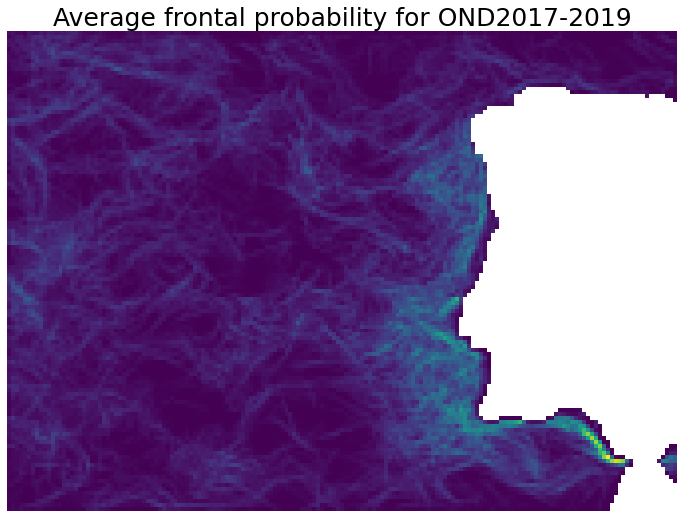

In [32]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny)    #'gray'-> parametro para por a preto e branco
plt.title("Average frontal probability for OND2017-2019", fontsize=25)
plt.axis('off');

### Outra forma: fazer tudo como antes e só no canny final aplicar a mascara

Para fazer isto comentei toda a parte da mask na função canny_creation e só depois de fazer as médias dos pixeis dos cannys para cada dia é que apliquei a parte da mask e da dilatação.

In [237]:
mask = np.isnan(np.flipud(Temp))
mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")
kernel = np.ones((3,3), np.uint8)
mask_dilated = cv2.dilate(mask255, kernel)
canny =np.ma.masked_where(mask_dilated==255, canny)

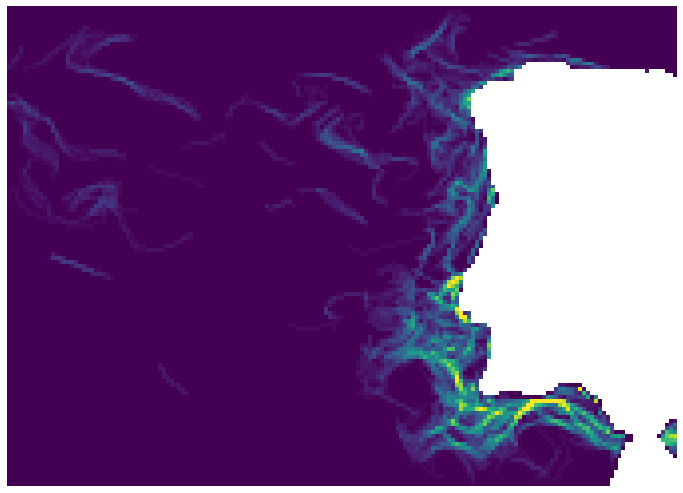

In [238]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny, vmax=0.4)    #'gray'-> parametro para por a preto e branco
plt.axis('off');

In [ ]:
#Os resultados são iguais quer se aplique a mascara no inicio a cada array ou só no canny final

### Aplicar um gaussian Blur previamente para tentar melhorar visualização

In [33]:
from scipy.ndimage import gaussian_filter

In [34]:
def canny_creation_gaussianFilter(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    Temp_day = gaussian_filter(Temp_day, sigma=1)   #apply gaussian filter to blur image 
    
    #apply the canny algorithm and plot the image with the edges
    canny_blur = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    canny_blur =np.ma.masked_where(mask_dilated==255, canny_blur)
    
    return canny_blur
    #return Temp_day

In [35]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation_gaussianFilter e somo esses valores ao array canny

canny_blur = np.zeros((121,169))
for days in ond2017_2019:
    canny_blur = canny_blur + canny_creation_gaussianFilter(df[days], 180)

In [36]:
canny_blur_max = canny_blur.max()
canny_blur_max 

33150.0

In [37]:
# tenho de dividir por este valor pelo nr de dias em questão
canny_blur = canny_blur/(canny_blur_max) 

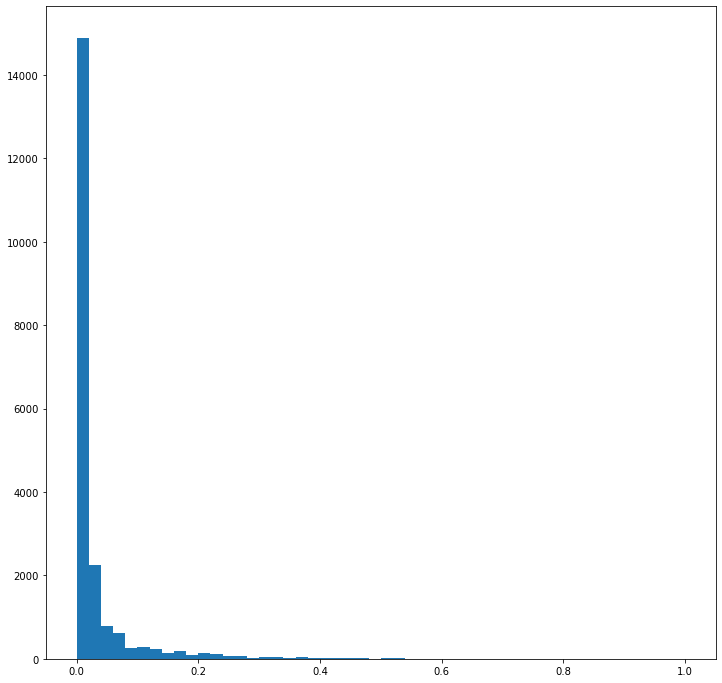

In [38]:
plt.hist(canny_blur.flatten(), bins=50);
plt.rcParams["figure.figsize"] = 8, 6

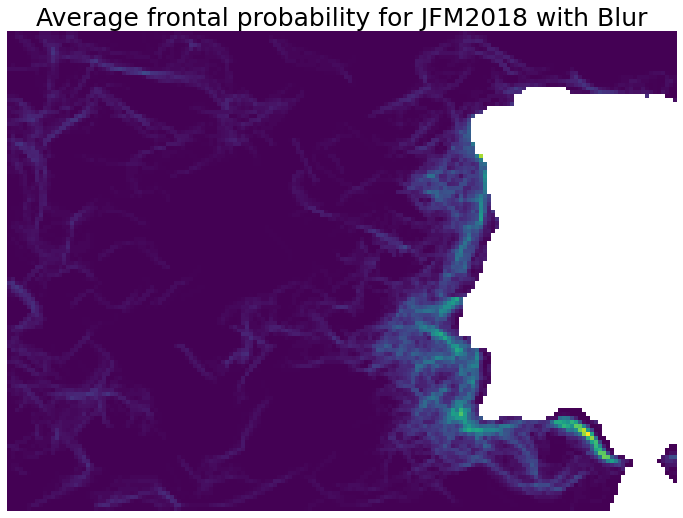

In [39]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny_blur)    #'gray'-> parametro para por a preto e branco
plt.title("Average frontal probability for JFM2018 with Blur", fontsize=25)
plt.axis('off');

#### Differences between applying or not a Gaussian Filter

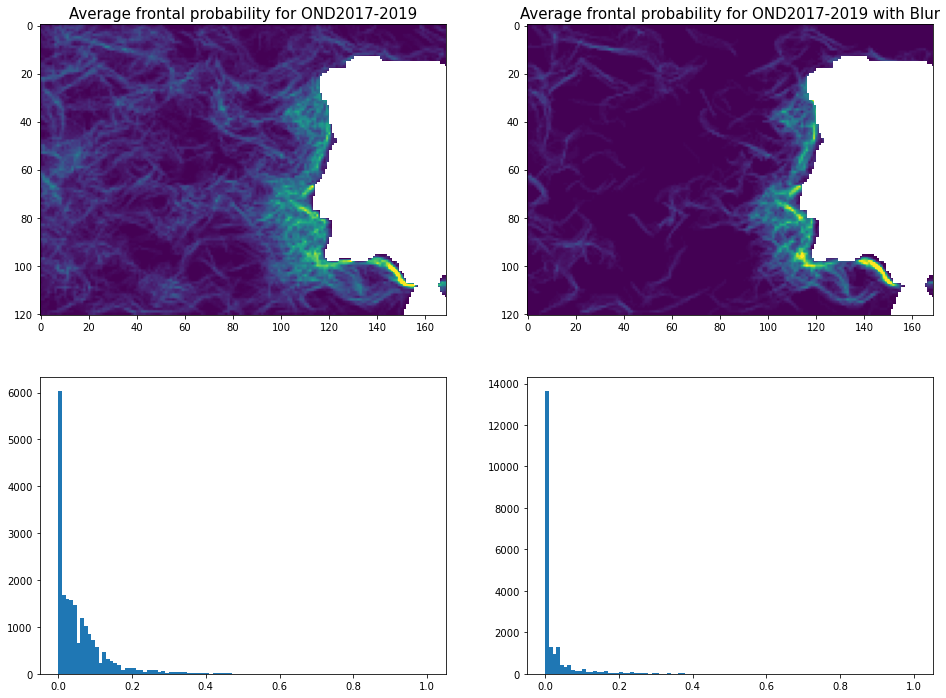

In [40]:

plt.rcParams["figure.figsize"] = 16, 12
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(canny, vmax=0.6) 
plt.title("Average frontal probability for OND2017-2019", fontsize=15)

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(canny_blur, vmax=0.6) 
plt.title("Average frontal probability for OND2017-2019 with Blur", fontsize=15)

ax2 = fig.add_subplot(2,2,3)
ax2.hist(canny.flatten(), bins=100);

ax2 = fig.add_subplot(2,2,4)
ax2.hist(canny_blur.flatten(), bins=100); 


### Aplicar variação do threshold diretamente na imagem já com as masks aplicadas

In [41]:
def preprocessing(df):
    
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).

    
    return Temp_day

In [42]:

canny2 = np.zeros((121,169))
for days in ond2017_2019:
    canny2 = canny2 + preprocessing(df[days])

In [43]:
canny2 = canny2/len(ond2017_2019)
canny2

array([[ 79.94052045,  78.59851301,  77.32342007, ...,  75.27881041,
         75.20446097,  75.9070632 ],
       [ 81.50929368,  80.34200743,  78.60966543, ...,  76.44981413,
         77.11152416,  78.37174721],
       [ 81.08550186,  80.73605948,  79.41635688, ...,  76.56505576,
         78.0260223 ,  80.04460967],
       ...,
       [225.20446097, 226.16356877, 226.89962825, ...,   0.        ,
          0.        ,   0.        ],
       [226.32342007, 227.15241636, 227.98141264, ...,   0.        ,
          0.        ,   0.        ],
       [226.98513011, 227.66171004, 228.48698885, ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
canny2 = canny2.astype('uint8')
canny2

array([[ 79,  78,  77, ...,  75,  75,  75],
       [ 81,  80,  78, ...,  76,  77,  78],
       [ 81,  80,  79, ...,  76,  78,  80],
       ...,
       [225, 226, 226, ...,   0,   0,   0],
       [226, 227, 227, ...,   0,   0,   0],
       [226, 227, 228, ...,   0,   0,   0]], dtype=uint8)

In [45]:
from IPython.display import display
from IPython.html.widgets import interact, fixed

#cbarkw = dict(shrink=0.73, extend='both')

def canny_threshold(image, threshold=70, ratio=2, ksize=3):
    
    detected_edges = cv2.Canny(canny2, threshold,
                               threshold*ratio,
                               apertureSize=ksize)
    # Just add some colours to edges from original data.
    mask = np.ma.masked_equal(detected_edges, 0).mask
    img = np.ma.masked_array(canny2, mask)
    
    mask2 = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask2,(np.ones(mask2.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    detected_edges =np.ma.masked_where(mask_dilated==255, detected_edges)
    
    fig, ax = plt.subplots(figsize=(10,8))
    cs = ax.imshow(img)
    #cbar = fig.colorbar(cs, ax=ax, **cbarkw)
    ax.axis('off')
    plt.show()

lims = (0, 100)
w = interact(canny_threshold, threshold=lims,
             image=fixed(canny2),
             ratio=fixed(3), ksize=fixed(3))

display(w)

C:\Users\asus\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(IntSlider(value=70, description='threshold'), Output()), _dom_classes=('widget-interact'…

<function __main__.canny_threshold(image, threshold=70, ratio=2, ksize=3)>